# Cumulative Particle Density Distributions
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 7/2/2021|
|Updated | 7/2/2021|

In [1]:
import sys
sys.path.insert(0, '/home/stanley/github/sabaronett/local/athena/athena-dust/vis/python')
import athena_read
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import animation

In [2]:
# Collect .athdf outputs
athinput = athena_read.athinput('athinput/cc-mod.athinput.si')
outputs = sorted(list(Path('athdf').glob(athinput["job"]["problem_id"]+'.out2.*.athdf')))

In [3]:
# Init sim constants and grid
nx1 = athinput['mesh']['nx1']              # num. radial zones
nx2 = athinput['mesh']['nx2']              # num. vertical zones
nx3 = athinput['mesh']['nx3']              # num. azimuthal zones
c_s = athinput['hydro']['iso_sound_speed'] # sound speed
Omega = athinput['problem']['omega']       # local Keplerian angular frequency
epsilon = athinput['problem']['epsilon']   # avg. dust/gas ρ-ratio in BG state
Np_tot = athinput['problem']['npx1']\
    *athinput['problem']['npx2']\
    *athinput['problem']['npx3']           # total number of particles
Np = Np_tot/nx1/nx2/nx3                    # theo avg num particles per cell
H = c_s / Omega                            # gas scale height
T = 2*np.pi/Omega                          # orbital period
data = athena_read.athdf(outputs[0])
xf, zf = data['x1f'] / H, data['x2f'] / H

In [63]:
# Load data into memory
times, rhopxs, cdfs = [], [], []

for output in outputs:
    data = athena_read.athdf(output)
    times.append(data['Time'] / T)
    rhopx = np.sum(data['rhop'], (0,2))  # sum along z not needed!!!
    rhopxs.append(epsilon*np.sort(rhopx)) # shape(Ny, Nx, Nz)
    cdfs.append(np.arange(nx1-1, -1, -1) / nx1)

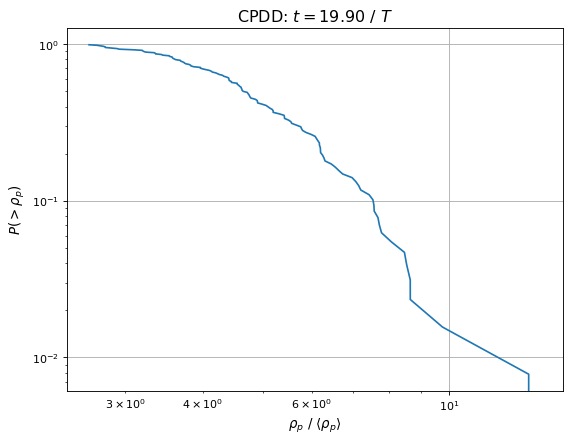

In [70]:
# CPDD
fig, ax = plt.subplots(figsize=(8,6), dpi=80)
# ax.set_aspect('equal')
ax.set_title('CPDD: $t={:.2f}$ / $T$'.format(times[0]), size='x-large')
ax.set_xlabel(r'$\rho_p$ / $\langle \rho_p \rangle$', size='large')
ax.set_ylabel(r'$P(>\rho_p)$', size='large')
ax.loglog(rhopxs[0], cdfs[0])
ax.grid()